<style TYPE="text/css">
code.has-jax {font: inherit; font-size: 100%; background: inherit; border: inherit;}
</style>
<script type="text/x-mathjax-config">
MathJax.Hub.Config({
    tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        skipTags: ['script', 'noscript', 'style', 'textarea', 'pre'] // removed 'code' entry
    }
});
MathJax.Hub.Queue(function() {
    var all = MathJax.Hub.getAllJax(), i;
    for(i = 0; i < all.length; i += 1) {
        all[i].SourceElement().parentNode.className += ' has-jax';
    }
});
</script>
<script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.4/MathJax.js?config=TeX-AMS_HTML-full"></script>

# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек 

Выполнил студент гр. 9383 Моисейченко Кирилл, вариант 99.



## 1. Цель работы

Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## 2. Основные теоретические положения

### Бинарный метод

Бинарный метод - алгоритм, предназначенный для возведения числа ${x}$ в натуральную степень ${n}$ за меньшее число умножений, чем это требуется в определении степени. Основной идеей метода является разбиение искомого числа ${x^n}$ на произведение ${x}$ в некоторых степенях. Алгоритм работает следующим образом:

Слева направо просматривается бинарная запись числа ${n}$ без первого бита, так как он всегда равен 1.
- Если текущий бит - это ${1}$, то текущее число возводится в квадрат, после чего еще раз умножается на ${x}$.
- Если текущий бит - это ${0}$, то текущее число возводится в квадрат.

Таким образом, количество операций умножения вычисляется по формуле: 

${\lambda (n) + \nu (n) - 1}$, где ${\lambda (n) = \left \lfloor lb(n) \right \rfloor}$, а ${\nu(n)}$ - вес Хэмминга для бинарного представления числа ${n}$, то есть число ненулевых битов в двоичной записи числа.

### Метод множителей

Метод множителей - еще один метод возведения числа ${x}$ в натуральную степень ${n}$, который базируется на бинарном методе. Данный алгоритм работает следующим образом:

Находим такое число ${i}$, которое является наименьшим простым множителем числа ${n}$.
Вычисляем число ${j}$, такое что: ${i*j=n}$.
Возводим число ${x}$ в полученную ранее степень ${i}$, затем полученное число возводим в степень ${j}$.
Если число ${n}$ - простое, то сначала вычисляется ${x^{-1}}$, которое после домножается на ${x}$.
Допустим, что возможно посчитать ${x^i}$ за ${m}$ операций, а ${y^j}$ за ${k}$ операций, где ${y = x^i}$. Тогда утверждается, что ${x^{i \cdot j}}$ можно посчитать за ${(m + k)}$ операций.

### Аддитивная цепочка

Аддитивная цепочка — последовательность натуральных чисел ${a_0, a_1, a_2, ..., a_m = n}$, в которой первый элемент всегда равен ${1}$, а каждый последующий элемент является суммой каких-то двух предшествующих элементов. То есть:
- ${a_0 = 1}$ 
- ${\forall i > 0, a_i = a_j + a_k , j,k < i}$ - шаг аддитивной цепочки.

Шаги бывают следующие:
- ${i}$-шаг - удвоение, если ${j = k = i - 1}$
- ${i}$-шаг - звездный, если ${j = i - 1}$, ${k = \overline{0 .. (i-1)}}$
- ${i}$-шаг - малый, если ${\lambda(a_i) = \lambda(a_{i-1})}$

### Алгоритм Брауэра

Данный алгоритм вычисляет ${a^n}$ за ${lb(n) + \frac{(1 + \mathcal{O}(1)) * lb(n)}{lb(lb(n))}}$ операций.

Для этого испрользуются цепочки Брауэра, они выглядят следующим образом:

${B_k(n) = \begin{cases}
1, 2, 3, ..., 2^k - 1 & \text{ if } n < 2^k \\ 
B_k(q), 2q, 4q, ..., 2^k q, n & \text{ if } n \geqslant 2^k, q = \left \lfloor \frac {n}{2^k} \right \rfloor
\end{cases}}$, где ${k}$ - параметр, выбранный вручную

Иначе говоря, число ${n}$ представляется в следующем виде:

${n = \sum_{i=0}^{j} a_i  2^{ik}, a_j \ne 0}$

Длина соответствующей цепочки равняется:

${l_B(n) = j(k+1) + 2^k - 2, jk \leqslant lbn < (j+1)k}$ для ${k \sim lb(lb(n)) - 2lb(lb(lb(n)))}$

Алгоритм работает следующим образом:
- Принимаются два числа n и k.
- Выполняется вычисление вспомогательные чисел. ${d := 2^k, q_1 = \left [ \frac{n}{d} \right ], r_1 = n \% d}$, то есть ${n = q_1 d + r_1, 0 \leqslant r_1 < d}$
- Далее вычисляются следующие числа: ${q_2 = \left [ \frac{q_1}{d} \right ], r_2 = q_1 \%d \Leftrightarrow q_1 = q_2 d + r_2}$
- До тех пор, пока не получится ${q_s < d \Rightarrow q_{s-1} = q_s d + r_s}$ 

В результате: ${n = 2^k q_1 + r_1 = 2^k(2^k q_2 + r_2) + r_1 = ... = 2^k(2^k(...(2^kq_s + r_s)...) + r_2) + r_1}$

После этого рассмотрим тривиальную Брауэровскую цепочку ${B_k(n) = 1, 2, 3, ..., 2^k -1}$ и будем ее дополнять:
${B_k(n) = 1, 2, 3, ..., 2^k - 1, 2q_s, 4q_s, 8q_s,..., 2^k q_s, 2^k q_s + r_s, ..., n}$

Можно заметить следующие оптимизации:
- В случае ${n < 2^k}$ достаточно цепочки ${\left\{ 1, 2, 3, ..., b\right\}}$, где ${b = \max\left\{q_s, r_i\right\}}$ ${i = \overline{1..s}}$.
- Можно опускать операции, в которых ${r_i = 0}$.

### Звездная цепочка.

Звездная цепочка - это аддитивная цепочка, включающая только звездные шаги.

${l^{*}(n)}$ - минимальная звездная цепочка. Очевидно, что ${l^{*}(n) \geq l(n)}$

### Алгоритм дробления вектора индексов

Данный алгоритм находит минимальную звездную цепочку для числа ${n}$.

Пусть у нас есть звездная цепочка длины ${l(n) = m-1}$.
Тогда для каждой такой звездной цепочки можно задать вектор индексов вида ${\left \{ r_1, r_2, ..., r_{m-1} \right \} : r_i = \left\{x: 1 \leqslant x \leqslant i\right\}}$. Тогда можно записать наш шаг в виде ${a_i = a_{i-1} + a_{r_{i-1}}}$.

Минимальная звездная цепочка находится перебором. Для уменьшения числа операций разделим наш вектор индексов на две части - фиксированную и менящийся остаток:

${\left\{r_i\right\}_{i=1}^q \cup \left\{\rho_i\right\}_{j=q+1}^m}$, где ${\rho_{j} = \left\{ x : 1 \leq x \leq j \right\}}$.

Заметим, что наибольший ${a_m}$ получается в цепочке ${\left\{r_i\right\}_{i=1}^q \cup \left\{q+1, q+2, ..., m\right\}}$, а наименьший в цепочке ${\left\{r_i\right\}_{i=1}^q \cup \left\{1, 1,..., 1\right\}}$. Соответственно, получаем формулы:
- ${a_{min} = a_{q+1} + m - q}$
- ${a_{max} = a_{q+1} \cdot 2^{m-q}}$

В итоге алгоритм работает следующим образом:

Рассматриваются аддитивные цепочки с длиной ${m}$, где ${\underline{l}(n) \leqslant m \leqslant \bar{l}(n)}$, при этом ${\underline{l}(n) = \lfloor lb(n) \rfloor}$ и ${\bar{l}(n) = \lambda(n) + \nu(n) - 1}$.
Выберается целое ${q: 1 \leqslant q \leqslant m - 1}$. Затем перебираются все векторы индексов ${\left\{r_i\right\}_{i=1}^q}$ и на каждом шаге строится звездную цепочку и вычисляются ${a_{min}}$ и ${a_{max}}$.
- Если ${a_m = n}$, то задача решена
- Если ${n \notin [a_{min}, a_{max}]}$, то происходит переход к следующему набору ${\left\{r_i\right\}}$.
- Если ${n \in [a_{min}, a_{max}]}$, то перебирается меняющийся кусок вектора индексов ${\left\{\rho_i\right\}_{j=q+1}^m}$.
- Если все ${\left\{\rho_i\right\}}$ просмотрены, то происходит переход к следующему набору  ${\left\{r_i\right\}}$.
- Если дошли до ${\left\{1,1,...,1\right\}\cup\left\{1,1,...,1\right\}}$, и минимальная цепочка не была найдена, то m увеличивается на ${1}$ и происходит перебор сначала.

### Теорема Брауэра

Теорема Брауэра гласит, что при некотором ${k < lb(lb(n))}$ справедливо следующее неравенство ${l(n) < (1 + k^{-1})\left \lceil lb(n) \right \rceil + 2^{k-1} - k + 2}$.

#### Следствие 1.
Если ${k = \lambda(\lambda(n)) - 2\lambda(\lambda(\lambda(n)))}$, то ${\lim_{n \to \infty} \frac{l(n)}{\lambda(n)} = 1}$

#### Следствие 2.
Наименьшая верхняя оценка: ${\lambda(n)(1 + \frac{1}{\lambda(\lambda(n))} + \frac{\mathcal{O}(\lambda(\lambda(\lambda(n))))}{{\lambda(\lambda(n))}^2}}$

### Гипотеза Шольца-Брауэра
Гипотеза Шольца-Брауэра гласит: ${l^*(2^n-1) \leqslant l^*(n)+n-1}$

## 3. Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## 4. Порядок выполнения работы

1. Применить бинарный метод и метод множителей для ${x^n}$, где ${n \geqslant 3}$, для 2-3 значений ${n}$ (значения ${n}$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра ${k}$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при ${n>500}$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить теорему Брауэра для ${n=1..200}$ путём построения функции ${l(n)}$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для ${1\leqslant n \leqslant 10}$ на алгоритме дробления вектора индексов. Сделать выводы.

## 5. Решение задач вычисления степеней бинарным методом и методом множителей

### Бинарный метод

In [1]:
def binaryMethod(x, n):
    counter = 0
    x_tmp = x
    bin_tmp = bin(n)[3:]
    for i in bin_tmp:
        counter += 1
        if (i == '1'):
            x_tmp = x_tmp**2
            x_tmp = x*x_tmp
            counter += 1
        else:
            x_tmp = x_tmp**2 
    return (x_tmp, counter)

### Метод множителей

In [2]:
def minPrime(n): 
    for i in range(2, int(n**0.5) + 1):
        if (n%i == 0):
            return i
    return 1

def coefMethod(x, n):
    min_prime = minPrime(n)
    x_tmp, counter_1 = binaryMethod(x, min_prime)
    result, counter_2 = binaryMethod(x_tmp, n // min_prime)
    return (result, counter_1 + counter_2)

### Сравнение бинарного метода и метода сомножителей

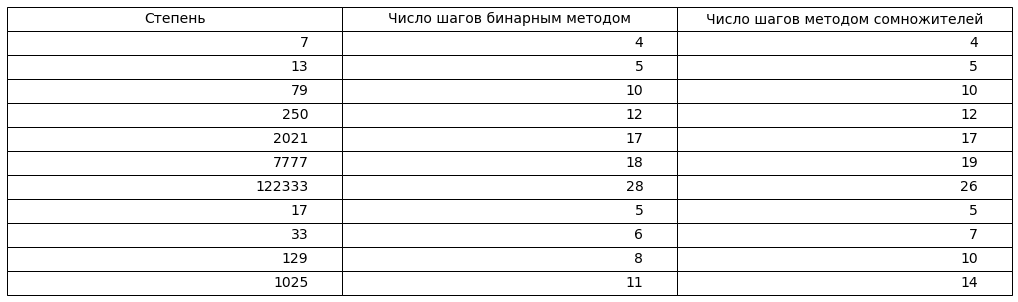

In [3]:
import matplotlib.pyplot as plt
x = 99
n = [7, 13, 79, 250, 2021, 7777, 122333, 17, 33, 129, 1025]

columns = ("Степень", "Число шагов бинарным методом", "Число шагов методом сомножителей")

cell_text = []
for i in range(len(n)):
    cell_text.append([n[i], binaryMethod(x, n[i])[1],coefMethod(x, n[i])[1] ])

table = plt.table(cellText=cell_text, colLabels=columns, loc='center')

table.set_fontsize(14)
table.scale(3, 2) 

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.draw()

### Выводы
Из результатов видно, что в среднем метод множителей возводит число в заданную степень либо за то же количество операций, что и бинарный метод, либо за меньшее число. Исключениями являются лишь степени вида ${n = 2^k + 1}$, в которых бинарный метод оказывается быстрее.

## 6. Реализация алгоритма Брауэра

In [4]:
def auxiliary(n, k):
    
    d = 2**k
    q_arr = []
    r_arr = []
    q_arr.append(n // d)
    r_arr.append(n % d)
    
    while (q_arr[-1] >= d):
        r_arr.append(q_arr[-1] % d)
        q_arr.append(q_arr[-1] // d)
    
    r_arr.append(q_arr[-1] % d)
    return (q_arr, r_arr)

def BrauerChain(n, k, chain_arr, q_arr, r_arr, index = 0):
    
    if (n < 2**k):
        for i in range(1, max(q_arr[-1], max(r_arr)) + 1):
            chain_arr.append(i)
    
    else:
        q = q_arr[index]
        index += 1
        tmp_q = q
        BrauerChain(q, k, chain_arr, q_arr, r_arr, index)
        for i in range(k):
            tmp_q *=2
            chain_arr.append(tmp_q)
            
        if (n != tmp_q):    
            chain_arr.append(n)
            
    return chain_arr

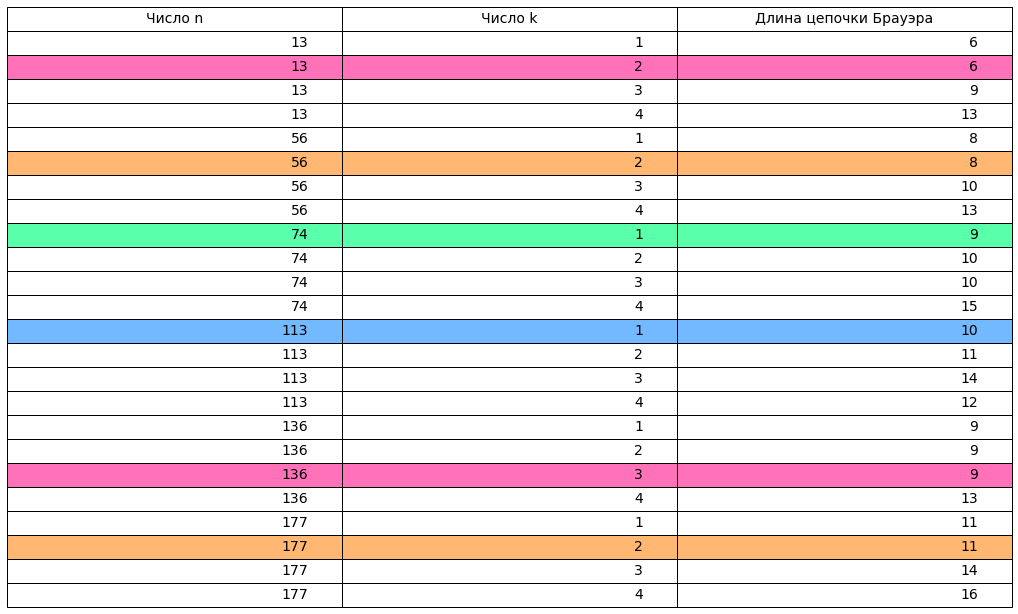

In [9]:
import matplotlib.pyplot as plt
n_arr = [13, 56, 74, 113, 136, 177]
k_min_for_n = []

k = [1, 2, 3, 4]

columns = ("Число n", "Число k", "Длина цепочки Брауэра")

cell_text = []
cell_text2 = []
for i in range(len(n_arr)):
    k_min = 1
    min_oper = n_arr[i]
    min_chain = []
    for j in range(len(k)):
        q_arr, r_arr = auxiliary(n_arr[i], k[j])
        B_arr = BrauerChain(n_arr[i], k[j], [], q_arr, r_arr)
        if(len(B_arr) <= min_oper):
            min_oper = len(B_arr)
            k_min = j + 1
            min_chain = B_arr
        cell_text.append([n_arr[i], k[j], len(B_arr)])
        
    k_min_for_n.append(k_min)
    cell_text2.append([n_arr[i], len(indexVectorFraction(n_arr[i])), len(min_chain), k_min, min_chain,  ])
        
colors = []
color_palette = ["w", "w", "w", "w"]
color_accent = ["#ff72b9", "#ffb772", "#59ffaa", "#72b9ff"]
for i in range(len(n_arr)):
    for j in range(len(k)):
        if k[j] == k_min_for_n[i]:
            colors.append([color_accent[i % len(color_accent)], color_accent[i % len(color_accent)], color_accent[i % len(color_accent)]])
        else:
            colors.append([color_palette[i % len(color_palette)], color_palette[i % len(color_palette)], color_palette[i % len(color_palette)]])

table = plt.table(cellText=cell_text, cellColours=colors, colLabels=columns, loc='center')

table.set_fontsize(14)
table.scale(3, 2) 

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.draw()

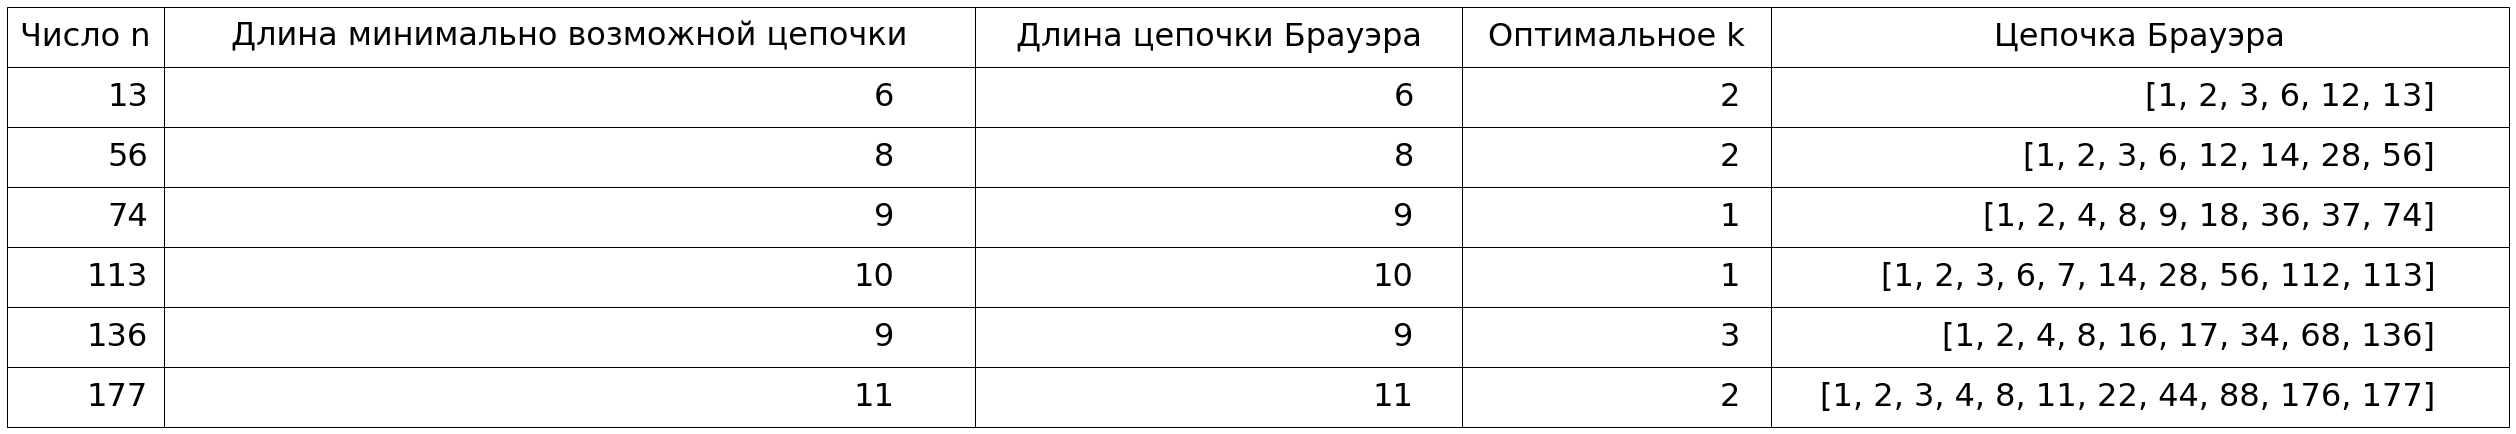

In [10]:
columns = ("Число n", "Длина минимально возможной цепочки", "Длина цепочки Брауэра", "Оптимальное k", "Цепочка Брауэра")
           
table = plt.table(cellText=cell_text2, colLabels=columns, loc='center')

table.set_fontsize(32)
table.scale(7, 5)
table.auto_set_font_size(False)
table.auto_set_column_width(col=list(range(len(cell_text2))))

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.draw()

### Выводы

По результатам эксперимента можно сделать выводы о том, что параметр k, как и ожидалось, влияет на длину получающейся цепочки Брауэра - в данном эксперименте длина цепочки Брауэра для одного и того же числа могла отличаться на 1-4 элемента в зависимости от k. Цепочка Брауэра иногда совпадала по длинне с минимально возможной цепочкой для заданного числа, но в остальных случаях была длиннее. Отсюда можно сделать выводы о том, что алгоритм Брауэра не гарантирует минимальность длины цепочки.

## 7. Реализация метода дробления вектора индексов

In [7]:
import time
import math

def nextVector(vector, q=0):
    l = len(vector)
    if (vector == [1 for i in range(l)]):
        return [0 for i in range(l)]
    for i in range(l - 1, -1, -1):
        if (vector[i] == 1):
            vector[i] = i + 1 + q
            continue
        vector[i] -= 1
        break
        
    return vector

def makeChain(ind):
    
    chain = [1]
    
    for i in ind:
        chain.append(chain[-1] + chain[i-1])
        
    return chain

def indexVectorFraction(n):
    
    for m in range(int(math.log(n, 2)), int(math.log(n, 2)) + bin(n)[3:].count('1') + 1):
        q = m // 2
        
        if (q == 0):
            q = 1
        
        r_arr = [i for i in range(1, q+1)]
        rho_arr = [q + i + 1 for i in range(m - q)]
        
        while (r_arr != [0 for i in range(q)]):
            chain = makeChain(r_arr + rho_arr)
            a_min = chain[q] + (m - q)
            a_max = chain[q] * 2 ** (m - q)
            
            if ((n < a_min) or (n > a_max)):
                r_arr = nextVector(r_arr)
                continue
                
            if (chain[-1] == n):
                return chain
            
            while (rho_arr != [0 for i in range(m - q)]):
                chain = makeChain(r_arr + rho_arr)
                
                if (chain[-1] == n):
                    return chain
                
                rho_arr = nextVector(rho_arr, q)
                
            r_arr = nextVector(r_arr)
            rho_arr = [q + i + 1 for i in range(m - q)]
            
    return chain

def contTime(n):
    start = time.time()
    answer = indexVectorFraction(n)
    end = time.time()
    return (answer, end-start)

In [8]:
n = [512, 649]
result = []
for i in n:
    answer, timer = contTime(i)
    result.append([i, len(answer), timer, answer])

for i in range(len(n)):
    print("N: " + str(result[i][0]))
    print("L: " + str(result[i][1]))
    print("Time " + str(result[i][2]))
    print("Chain " + str(result[i][3]))
    print("")

N: 512
L: 10
Time 2.4557113647460938e-05
Chain [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

N: 649
L: 13
Time 109.42915773391724
Chain [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 640, 648, 649]



### Выводы

Согласно полученным результатам можно сказать, что параметр k, влияет на длину получающейся цепочки Брауэра. Иногда алгоритм Брауэра выдает минимальную по длине цепочку, но далеко не всегда, а значит алгоритм Брауэра не гарантирует минимальность длины цепочки.

## 8. Проверка следствия 1 из теоремы Брауэра

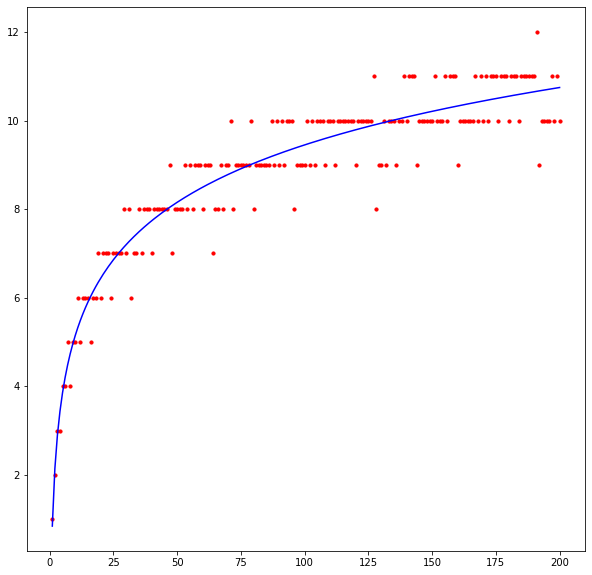

In [11]:
#https://mathworld.wolfram.com/LeastSquaresFittingLogarithmic.html
import numpy as np

max_N = 201
dots = [1, 2, 3, 3, 4, 4, 5] + [len(indexVectorFraction(i)) for i in range(8, max_N)]

def aCoef(y):
    n = len(y)
    y = np.array(y)
    x = np.array(range(1, n + 1))
    log_x = np.log(x)
    numerator = n * np.sum(np.multiply(y, log_x)) - np.sum(y) * np.sum(log_x)
    down = n * np.sum(np.square(log_x)) - np.sum(log_x) * np.sum(log_x)
    return numerator / down

def bCoef(y, a):
    n = len(y)
    y = np.array(y)
    x = np.array(range(1, n + 1))
    log_x = np.log(x)
    numerator = np.sum(y) - a*np.sum(log_x)
    return numerator / n

def f(a, b, x):
    return a*np.log(x) + b

a = aCoef(dots)
b = bCoef(dots, a)
n = len(dots)
size = 10
plt.figure(figsize=(10, 10))
plt.scatter(range(1, n+1), dots, s=size, color="red")
plt.plot(range(1, n+1), f(a, b, range(1, n + 1)), color='blue')
plt.show()

### Выводы

Исходя из графика, ${l(n)}$ аппроксимируется логарифмической кривой. По этой причине можно говорить о ее схожем с ${\lambda(n)}$ поведении на бесконечности. Это подтверждается следствием 1 из теоремы Брауэра.

## 9. Проверка гипотезы Шольца–Брауэра

In [12]:
first = [len(indexVectorFraction(2**i - 1)) for i in range(2, 11)]
second = [len(indexVectorFraction(i)) + i - 1 for i in range(2, 11)]
result = []
for i in range(9):
    result.append([i + 2, first[i], second[i]])
for i in range(len(result)):
    print("N:" + str(result[i][0]))
    print("l(2^n-1):" + str(result[i][1]))
    print("l(n)+n-1:" + str(result[i][2]))
    print("")

N:2
l(2^n-1):3
l(n)+n-1:3

N:3
l(2^n-1):5
l(n)+n-1:5

N:4
l(2^n-1):6
l(n)+n-1:6

N:5
l(2^n-1):8
l(n)+n-1:8

N:6
l(2^n-1):9
l(n)+n-1:9

N:7
l(2^n-1):11
l(n)+n-1:11

N:8
l(2^n-1):11
l(n)+n-1:11

N:9
l(2^n-1):13
l(n)+n-1:13

N:10
l(2^n-1):14
l(n)+n-1:14



### Выводы

Гипотеза Шольца-Брауэра верна для ${2 \leqslant n \leqslant 10}$

## 10. Общий вывод по проделанной работе

В ходе работы были изучены и применены на практике теоретические сведения об аддитивных цепочках и об алгоритмах нахождения аддитивных цепочек для заданного числа. Были реализованы бинарный метод, метод множителей, алгоритм Брауэра и алгоритм дробления вектора индексов, который работает медленнее вышеописанных, но гарантированно выводит минимально возможную цепочку для заданного числа. Также в ходе работы были проверены на практике следствие 1 из теоремы Брауэра и гипотеза Шольца-Брауэра.